In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [3]:
#캘리포니아 데이터 불러오기
from sklearn import datasets
dataset = datasets.fetch_california_housing()
df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
df['target'] = dataset.target
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


- MedInc: 중위소득
- HouseAge: 건축물 중위연령
- AveRooms: 방 개수
- AveBedrms: 침실 개수
- Population: 인구
- AveOccup: 주택점유율
- Latitude: 경도
- Longtitude: 위도

### 방의 개수 시각화

{'whiskers': [<matplotlib.lines.Line2D at 0x25680c7c910>,
 'caps': [<matplotlib.lines.Line2D at 0x25680cf61d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x25680ceb990>],
 'medians': [<matplotlib.lines.Line2D at 0x25680cf7a50>],
 'fliers': [<matplotlib.lines.Line2D at 0x25680ceaed0>],
 'means': []}

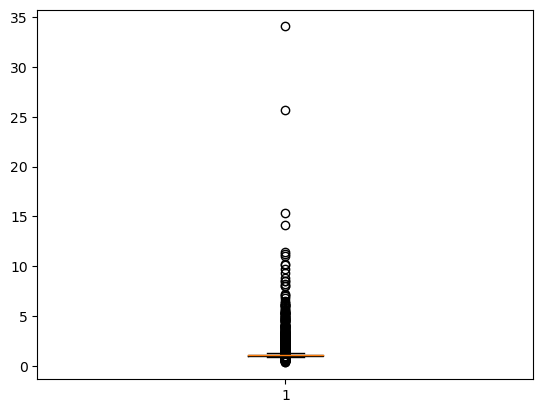

In [4]:
plt.boxplot(df['AveBedrms'])

{'whiskers': [<matplotlib.lines.Line2D at 0x25680dcac90>,
 'caps': [<matplotlib.lines.Line2D at 0x25680dd4610>,
 'boxes': [<matplotlib.lines.Line2D at 0x25680dca090>],
 'medians': [<matplotlib.lines.Line2D at 0x25680dd5b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x25680dd6650>],
 'means': []}

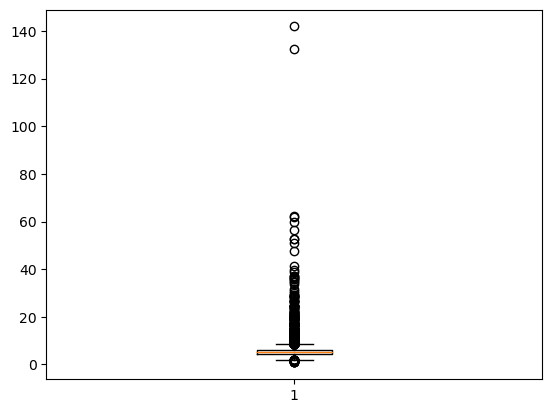

In [5]:
plt.boxplot(df['AveRooms'])

In [6]:
df[df['AveBedrms']>20]['target']

1914    5.00001
1979    1.62500
Name: target, dtype: float64

In [7]:
df[df['AveRooms']>120]['target']
#boxplot에서 'AveBedrms'와 'AveRooms'의 상단에 표시된 2개의 데이터는 같은 데이터임을 알 수 있음.
#한 개는 가장 높은 집값, 한 개는 평균 이하의 집값임.

1914    5.00001
1979    1.62500
Name: target, dtype: float64

In [8]:
df['target'].mean()

2.068558169089147

In [9]:
df.iloc[1979, :]

MedInc          4.625000
HouseAge       34.000000
AveRooms      132.533333
AveBedrms      34.066667
Population     36.000000
AveOccup        2.400000
Latitude       38.800000
Longitude    -120.080000
target          1.625000
Name: 1979, dtype: float64

In [10]:
df.iloc[1914, :]
#방 개수에 대한 두 개의 이상치 데이터만 봤을 때는 중위소득 컬럼만 유의미한 차이가 보임.
#하지만 중위소득이 높은 데이터의 target 값이 더 낮음 -> 분석 필요

MedInc          1.875000
HouseAge       33.000000
AveRooms      141.909091
AveBedrms      25.636364
Population     30.000000
AveOccup        2.727273
Latitude       38.910000
Longitude    -120.100000
target          5.000010
Name: 1914, dtype: float64

### 컬럼별 데이터 분포 확인

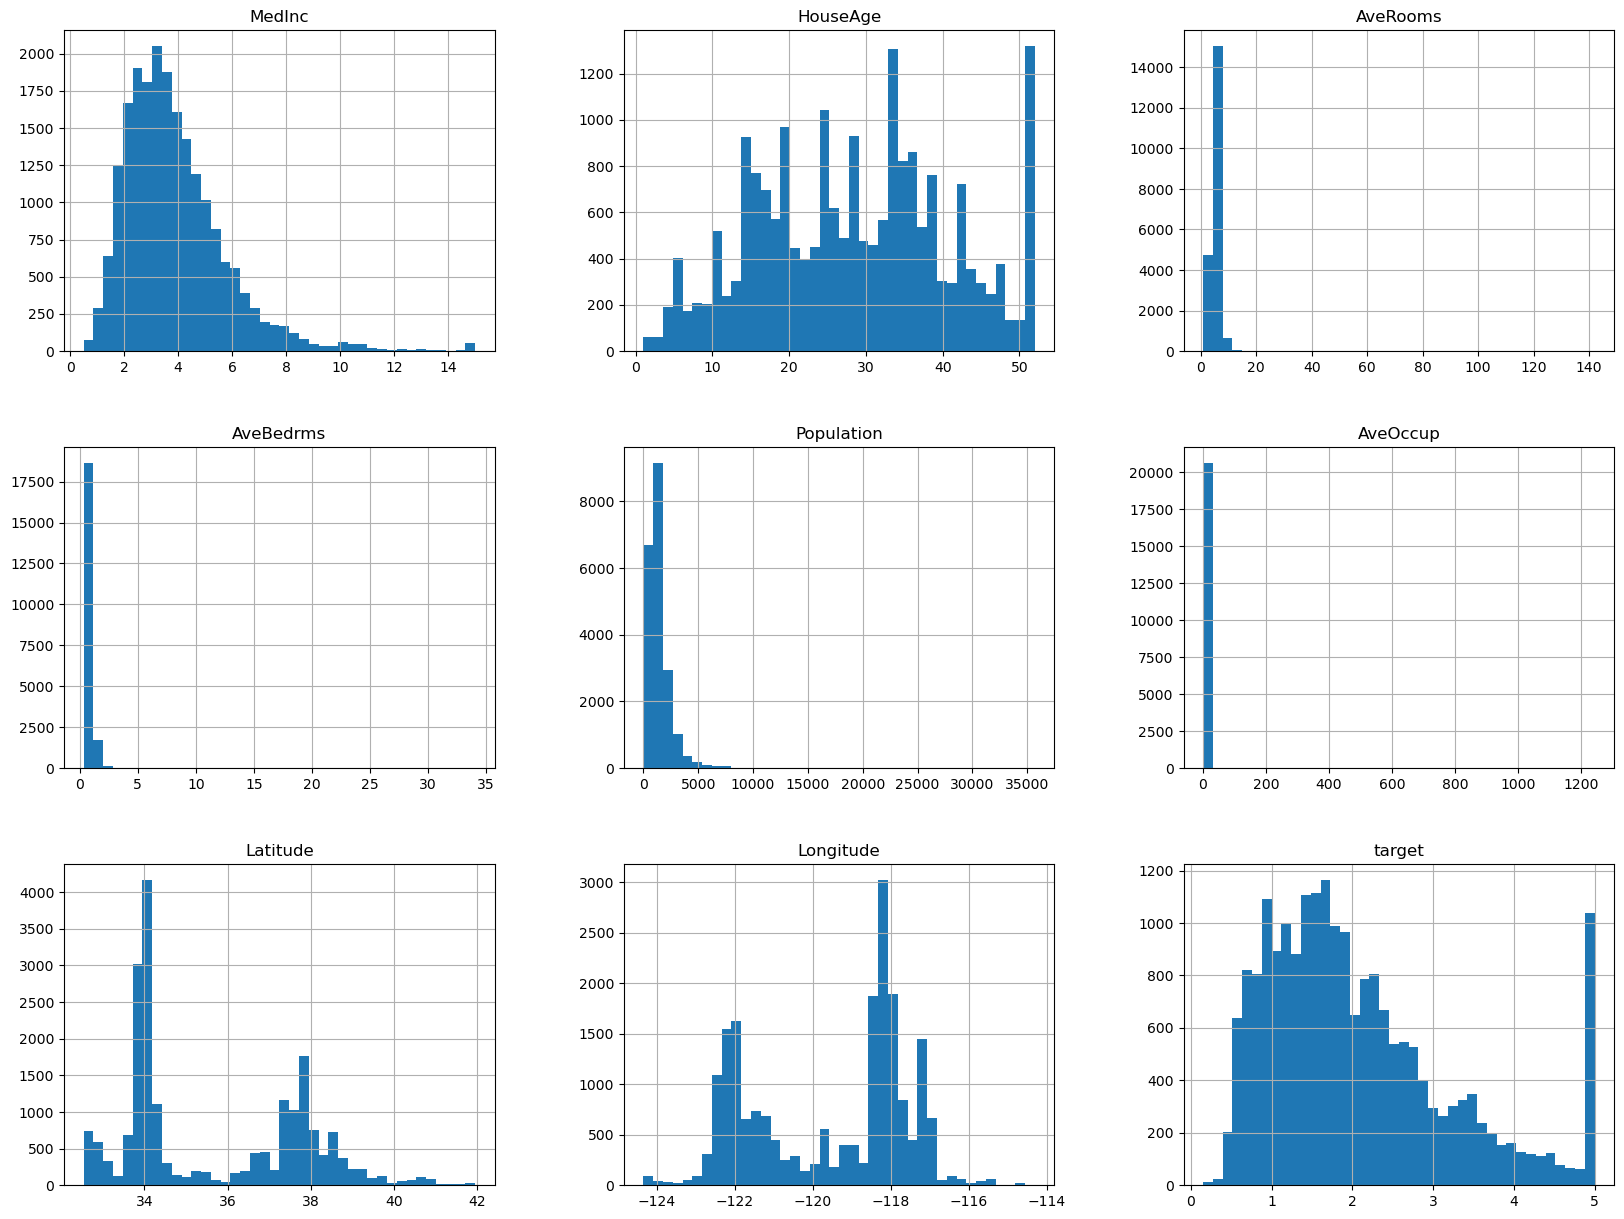

In [11]:
df.hist(bins=40, figsize=(20, 15))
plt.show()

### 중위소득 컬럼

(array([ 822., 6581.,    0., 7236.,    0., 3639., 1423.,    0.,  532.,
         407.]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <BarContainer object of 10 artists>)

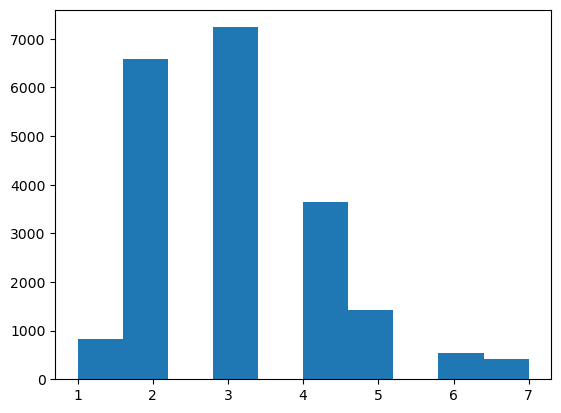

In [12]:
#중위소득별 카테고리화 -> 7개의 카테고리로 제한
df['income_idx'] = np.ceil(df['MedInc'] / 1.5)
df['income_idx'].where(df['income_idx']<7, 7, inplace = True)
plt.hist(df['income_idx'])

In [13]:
df.groupby('income_idx')['target'].mean()
#중위소득과 집값은 선형관계임을 알 수 있음.

income_idx
1.0    1.121252
2.0    1.365441
3.0    1.996133
4.0    2.582900
5.0    3.363416
6.0    4.144244
7.0    4.799352
Name: target, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x25682f86f50>,
 'caps': [<matplotlib.lines.Line2D at 0x25682f94250>,
 'boxes': [<matplotlib.lines.Line2D at 0x25682dab050>],
 'medians': [<matplotlib.lines.Line2D at 0x25682f95310>],
 'fliers': [<matplotlib.lines.Line2D at 0x25682f95c90>],
 'means': []}

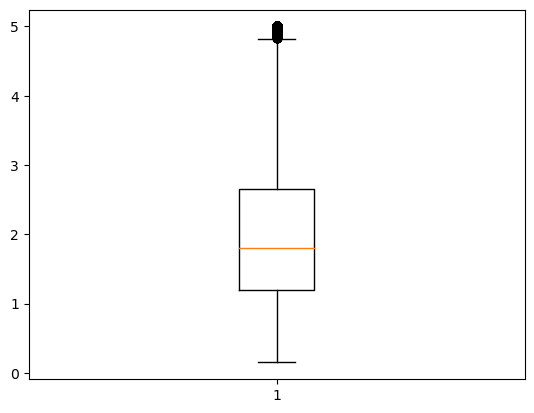

In [14]:
plt.boxplot(df['target'])

### houseage 컬럼

(array([1569.,    0., 4724.,    0.,    0., 4852.,    0., 5617.,    0.,
        3878.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

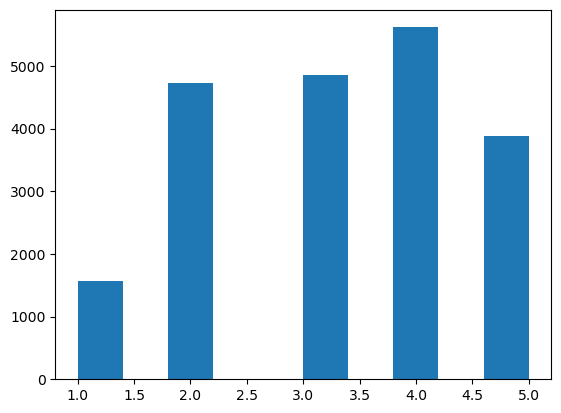

In [15]:
#건축물 나이별 카테고리화 -> houseage 컬럼은 전체적으로 고르게 퍼져 있으므로 10단위로 5개의 카테고리 생성
df['age_idx'] = np.ceil(df['HouseAge'] / 10)
df['age_idx'].where(df['age_idx']<5, 5, inplace = True)
plt.hist(df['age_idx'])

In [16]:
df.groupby('age_idx')['target'].mean()
#houseage는 범주화가 target 데이터를 설명하는 데 유의미하지 않음.

age_idx
1.0    2.002633
2.0    1.911816
3.0    2.068016
4.0    2.066622
5.0    2.289650
Name: target, dtype: float64

### 위도, 경도 컬럼

([<matplotlib.axis.YTick at 0x2568308b410>,
 [Text(0, 32, '32'),
  Text(0, 33, '33'),
  Text(0, 34, '34'),
  Text(0, 35, '35'),
  Text(0, 36, '36'),
  Text(0, 37, '37'),
  Text(0, 38, '38'),
  Text(0, 39, '39'),
  Text(0, 40, '40'),
  Text(0, 41, '41'),
  Text(0, 42, '42')])

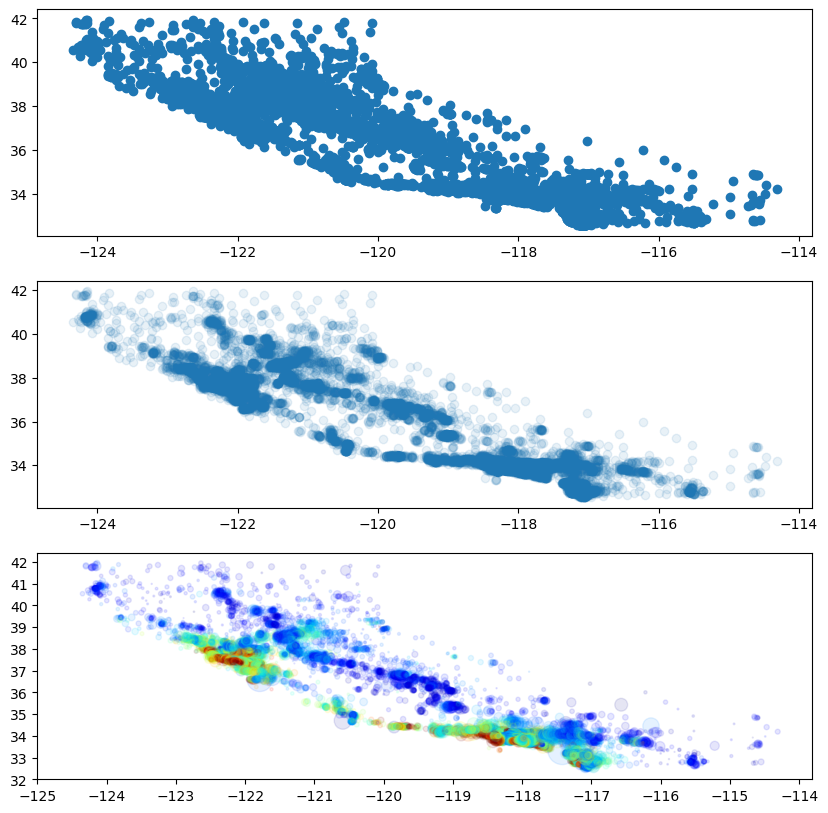

In [17]:
fig = plt.figure(figsize=(10,10))

plt.subplot(3,1,1)
plt.scatter(df['Longitude'], df['Latitude'])

plt.subplot(3,1,2)
plt.scatter(df['Longitude'], df['Latitude'], alpha=0.1)
#데이터가 밀집된 지역을 강조

plt.subplot(3,1,3)
plt.scatter(df['Longitude'], df['Latitude'], alpha=0.1,
           s=df['Population']/80,
           c=df['target'], cmap=plt.get_cmap("jet"))
plt.xticks(np.arange(-125, -113, 1))
plt.yticks(np.arange(32,43,1))
#인구밀도에 따른 target 데이터의 산점도 확인
#인구밀도가 높은 지역에 집값이 높은 것을 확인할 수 있음

### 컬럼간 상관계수

In [18]:
corr_matrix = df.corr()
corr_matrix['target'].sort_values(ascending=False)
#target 데이터에 영향을 주는 변수들 확인
#앞의 시각화 결과에서 관계성을 확인한 MedInc이 target에 많은 영향을 미치고 있음을 확인할 수 있음.

target        1.000000
MedInc        0.688075
income_idx    0.674701
AveRooms      0.151948
HouseAge      0.105623
age_idx       0.091337
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
Name: target, dtype: float64

In [19]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target,income_idx,age_idx
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,6.0,5.0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,6.0,3.0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,5.0,5.0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,4.0,5.0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,3.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,2.0,3.0
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,2.0,2.0
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,2.0,2.0
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,2.0,2.0


In [20]:
print(df['Longitude'].max(), df['Longitude'].min())
print(df['Latitude'].max(), df['Latitude'].min())
print(df['Population'].max(), df['Population'].min())
#위도와 경도의 범위

-114.31 -124.35
41.95 32.54
35682.0 3.0


{'whiskers': [<matplotlib.lines.Line2D at 0x2568372ef50>,
 'caps': [<matplotlib.lines.Line2D at 0x256837441d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2568370f550>],
 'medians': [<matplotlib.lines.Line2D at 0x25683745390>],
 'fliers': [<matplotlib.lines.Line2D at 0x25683745bd0>],
 'means': []}

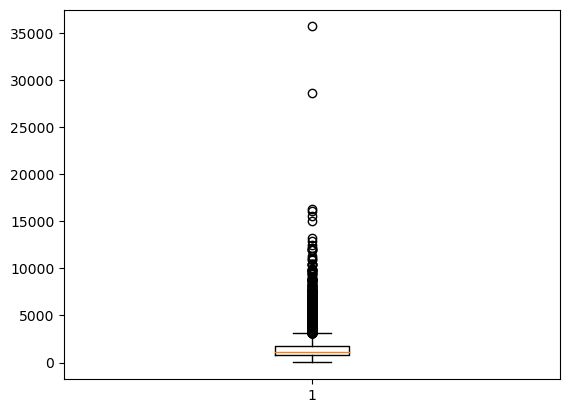

In [21]:
plt.boxplot(df['Population'])

In [22]:
pop_high = df[df['Population'] > 10000]
pop_low = df[df['Population'] <= 10000]

In [23]:
pop_high['target'].mean()

2.1479565217391303

In [24]:
pop_low['target'].mean()

2.0684695935393123

In [25]:
#region_1 = (-123~-122 / 37~38)
#region_2 = (-119~-118 / 33~34)

for i in range(len(df)):
    if (df.loc[i,'Longitude']>-123) & (df.loc[i,'Longitude']<-122) & (df.loc[i,'Latitude']>37) & (df.loc[i,'Latitude']<38):
        df.loc[i,'region_idx'] = 1
    elif (df.loc[i,'Longitude']>-119) & (df.loc[i,'Longitude']<-118) & (df.loc[i,'Latitude']>33) & (df.loc[i,'Latitude']<34):
        df.loc[i,'region_idx'] = 1
    else:
        df.loc[i,'region_idx'] = 0

In [26]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target,income_idx,age_idx,region_idx
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,6.0,5.0,1.0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,6.0,3.0,1.0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,5.0,5.0,1.0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,4.0,5.0,1.0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,3.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,2.0,3.0,0.0
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,2.0,2.0,0.0
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,2.0,2.0,0.0
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,2.0,2.0,0.0


In [27]:
corr_matrix = df.corr()
corr_matrix['target'].sort_values(ascending=False)
#새롭게 생성한 region_idx가 target 데이터와 약한 양의 상관관계를 보임

target        1.000000
MedInc        0.688075
income_idx    0.674701
region_idx    0.239968
AveRooms      0.151948
HouseAge      0.105623
age_idx       0.091337
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
Name: target, dtype: float64

In [29]:
df_f = df[['MedInc', 'income_idx', 'region_idx']]
target = df['target']

In [30]:
x_train, x_test, y_train, y_test = train_test_split(df_f, target, test_size=0.3, random_state=111)

In [32]:
rmse_val = []
for K in range(150):
    K = K+1
    model = KNeighborsRegressor(n_neighbors=K)
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    error=sqrt(mean_squared_error(y_test, pred))
    rmse_val.append(error)
    print('Rmse ', K, '=', error)

Rmse  1 = 1.1379085558354944
Rmse  2 = 0.9797509166539781
Rmse  3 = 0.9202233034704452
Rmse  4 = 0.8884573660390808
Rmse  5 = 0.8714343928880395
Rmse  6 = 0.8587125234481909
Rmse  7 = 0.8521874244746598
Rmse  8 = 0.8457324476435757
Rmse  9 = 0.8410464835904282
Rmse  10 = 0.8360064733960119
Rmse  11 = 0.8335818237155717
Rmse  12 = 0.8318466265722896
Rmse  13 = 0.8306007161428993
Rmse  14 = 0.8283459934291687
Rmse  15 = 0.8253111201996065
Rmse  16 = 0.8237490010897498
Rmse  17 = 0.822081340250081
Rmse  18 = 0.8217584115569825
Rmse  19 = 0.8199076719479892
Rmse  20 = 0.8195073055698074
Rmse  21 = 0.8179539114966529
Rmse  22 = 0.8167914126322973
Rmse  23 = 0.8156793387847502
Rmse  24 = 0.8149894090225568
Rmse  25 = 0.8148927815459981
Rmse  26 = 0.8150441035953776
Rmse  27 = 0.8152586850298316
Rmse  28 = 0.8152096409128414
Rmse  29 = 0.8146845236162261
Rmse  30 = 0.8143632556413377
Rmse  31 = 0.8141248386249594
Rmse  32 = 0.8135879822644596
Rmse  33 = 0.812646192567173
Rmse  34 = 0.81191609

<Axes: >

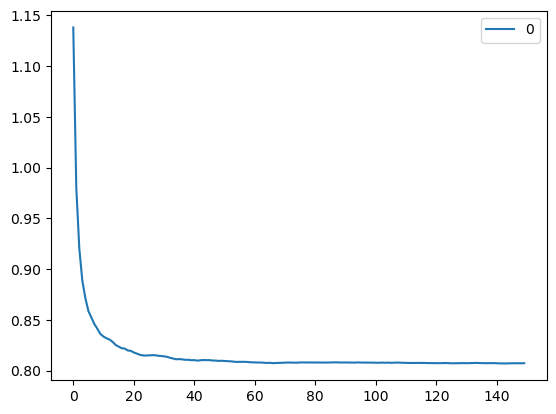

In [33]:
curve_1= pd.DataFrame(rmse_val)
curve_1.plot()

In [42]:
curve_1[0].min()

0.8070763680151963

In [47]:
rmse_val_2 = []
for K in range(100):
    K = K+1
    model = KNeighborsRegressor(n_neighbors=K)
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    error=sqrt(mean_squared_error(y_test, pred))
    rmse_val_2.append(error)
    print('Rmse ', K, '=', error)

Rmse  1 = 1.1379085558354944
Rmse  2 = 0.9797509166539781
Rmse  3 = 0.9202233034704452
Rmse  4 = 0.8884573660390808
Rmse  5 = 0.8714343928880395
Rmse  6 = 0.8587125234481909
Rmse  7 = 0.8521874244746598
Rmse  8 = 0.8457324476435757
Rmse  9 = 0.8410464835904282
Rmse  10 = 0.8360064733960119
Rmse  11 = 0.8335818237155717
Rmse  12 = 0.8318466265722896
Rmse  13 = 0.8306007161428993
Rmse  14 = 0.8283459934291687
Rmse  15 = 0.8253111201996065
Rmse  16 = 0.8237490010897498
Rmse  17 = 0.822081340250081
Rmse  18 = 0.8217584115569825
Rmse  19 = 0.8199076719479892
Rmse  20 = 0.8195073055698074
Rmse  21 = 0.8179539114966529
Rmse  22 = 0.8167914126322973
Rmse  23 = 0.8156793387847502
Rmse  24 = 0.8149894090225568
Rmse  25 = 0.8148927815459981
Rmse  26 = 0.8150441035953776
Rmse  27 = 0.8152586850298316
Rmse  28 = 0.8152096409128414
Rmse  29 = 0.8146845236162261
Rmse  30 = 0.8143632556413377
Rmse  31 = 0.8141248386249594
Rmse  32 = 0.8135879822644596
Rmse  33 = 0.812646192567173
Rmse  34 = 0.81191609

<Axes: >

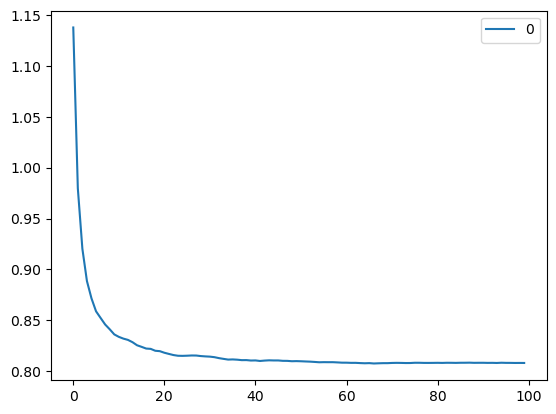

In [49]:
curve_2= pd.DataFrame(rmse_val_2)
curve_2.plot()

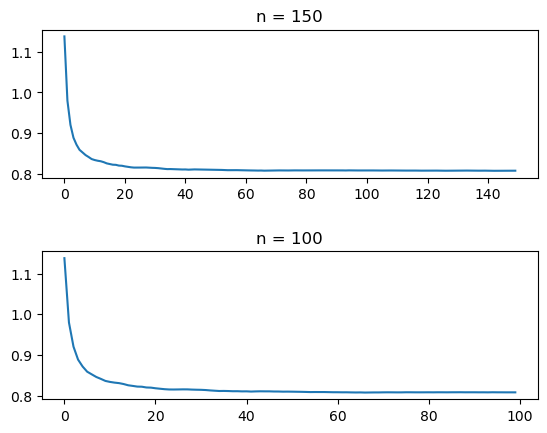

In [54]:
plt.subplot(2,1,1)
plt.plot(curve_1)
plt.title('n = 150')

plt.subplot(2,1,2)
plt.plot(curve_2)
plt.title('n = 100')

plt.subplots_adjust(hspace=0.5)
#n의 개수를 더 크게 설정했을 때 rmse값이 좀 더 빠르게 떨어진다는 것을 확인할 수 있음.